<a href="https://colab.research.google.com/github/t-sasatani/wpt-analysis/blob/main/examples/measurement_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if 'COLAB_GPU' in os.environ:
    !pip install git+https://github.com/t-sasatani/wpt-tools

In [2]:
from wpt_tools.analysis import RichNetwork, nw_tools

### Create instance of analysis and set initial variables

In [3]:
example_nw = RichNetwork.from_touchstone('./assets/sample.s2p')
example_nw.set_f_target_range(target_f=6.78e6, range_f=1e6)


### Plot Z-parameters (full-range)

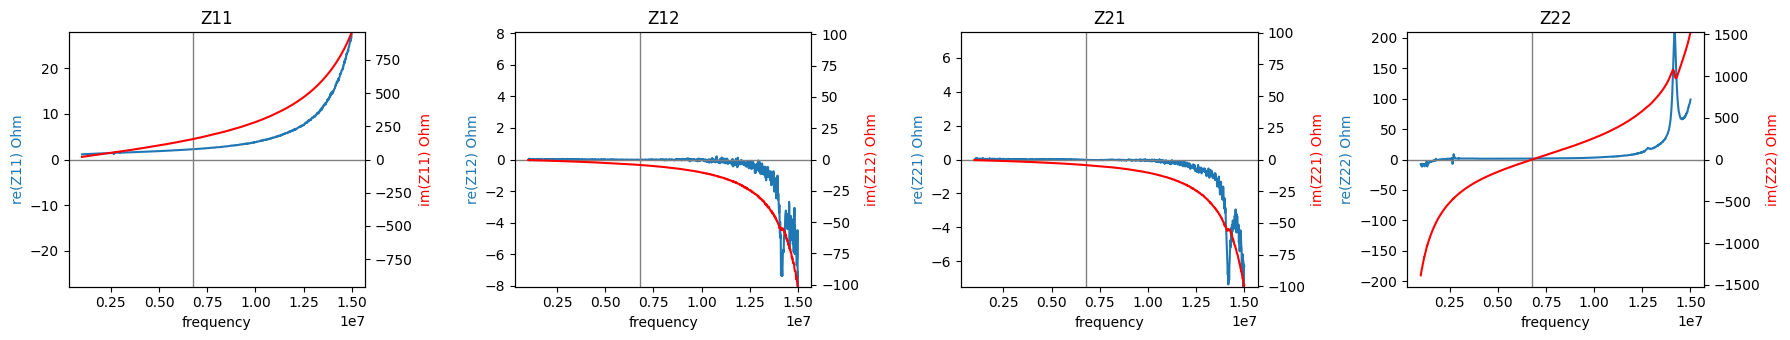

In [4]:
nw_tools.plot_z_full(example_nw)

### Efficiency and optimal load analysis (for general 2-port networks)
This becomes unstable when the analysis frequency is far from the resonant frequency.
This is probably because to S to Z conversion becomes unstable.

2025-10-07 21:09:36 [INFO] wpt_tools.analysis: Target frequency: 7.272e+06
2025-10-07 21:09:36 [INFO] wpt_tools.analysis: Maximum efficiency: 0.45
2025-10-07 21:09:36 [INFO] wpt_tools.analysis: Optimum Re(Zload): 6.39
2025-10-07 21:09:36 [INFO] wpt_tools.analysis: Optimum Im(Zload): -170.13


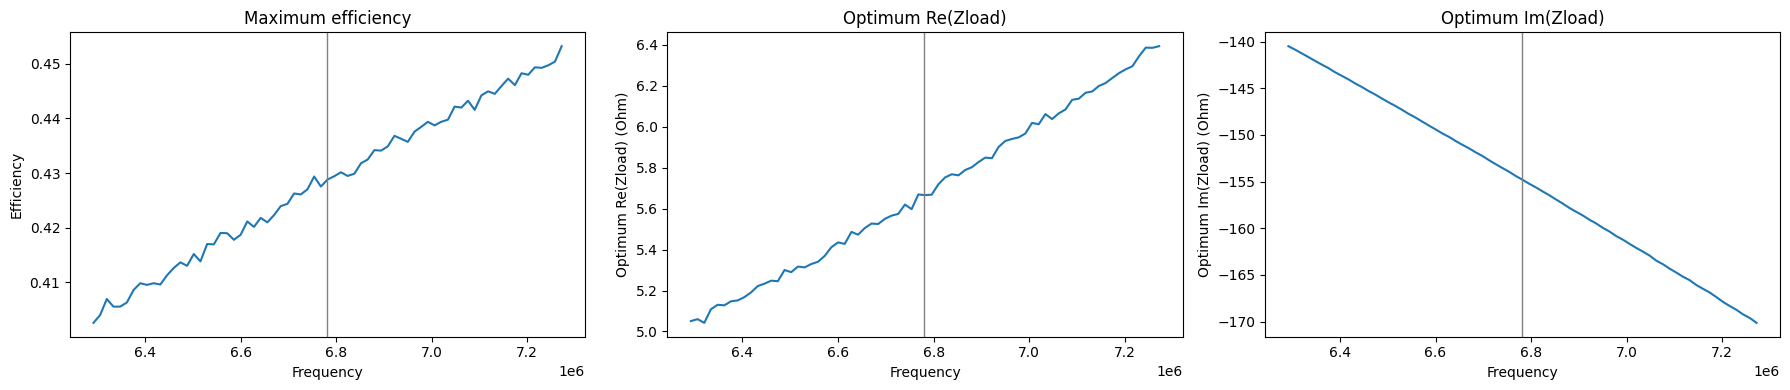

In [5]:
f_opt, eff_opt, r_opt, x_opt = nw_tools.analyze_efficiency(
    rich_nw=example_nw,
    show_plot=True,
    rx_port=1
    )

### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

2025-10-07 21:09:38 [INFO] wpt_tools.analysis: R2 for fitting Ls2, Cs2: 0.999822
2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Self impedance at target frequency

2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Re(Z11): 2.27e+00
Im(Z11): 1.55e+02

2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Re(Z22): 1.58e+00
Im(Z22) -3.21e-01

2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Fitting values assuming a pair of series LCR resonators

2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Ls1: 4.22e-06, Cs1: 9.48e-10, Rs1: 2.27e+00, f_1: 2.516e+06, Q_1 (approximate, @6.780e+06 Hz): 7.92e+01
2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Ls2: 6.02e-06, Cs2: 9.15e-11, Rs2: 1.58e+00, f_2: 6.782e+06, Q_2 (approximate, @6.780e+06 Hz): 1.62e+02
2025-10-07 21:09:38 [INFO] wpt_tools.analysis: Lm: -1.02e-07, km: -0.020


(np.float64(4.219400778712823e-06),
 np.float64(9.481653704397318e-10),
 array([2.27027173]),
 np.float64(6.020254725049123e-06),
 np.float64(9.147605993437378e-11),
 array([1.57843751]),
 array([-1.02031277e-07]))

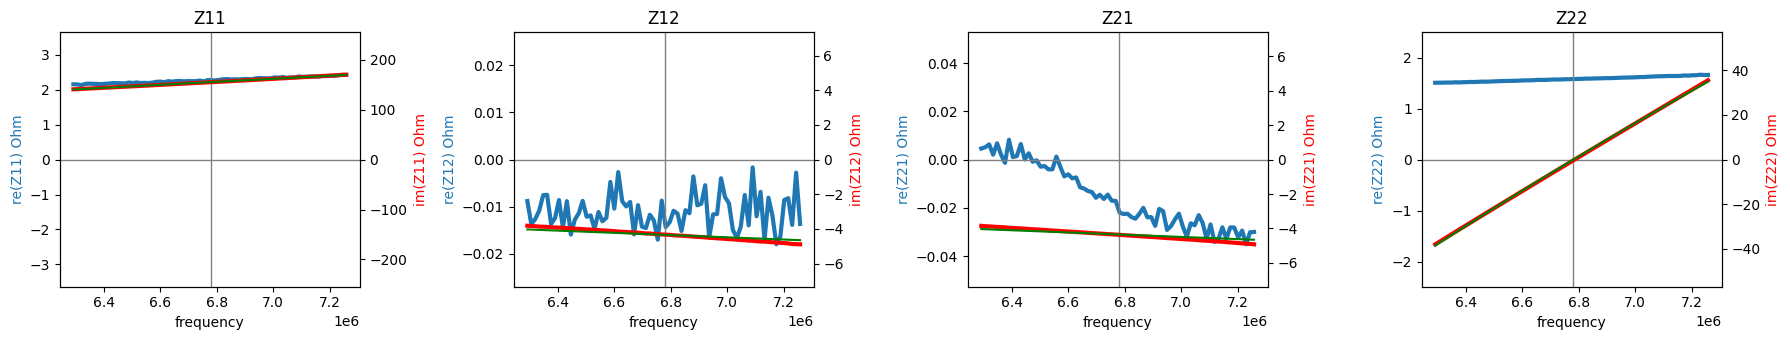

In [6]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

nw_tools.fit_z_narrow(
    rich_nw=example_nw,
    show_plot=1,
    )

### Optimal load visualization

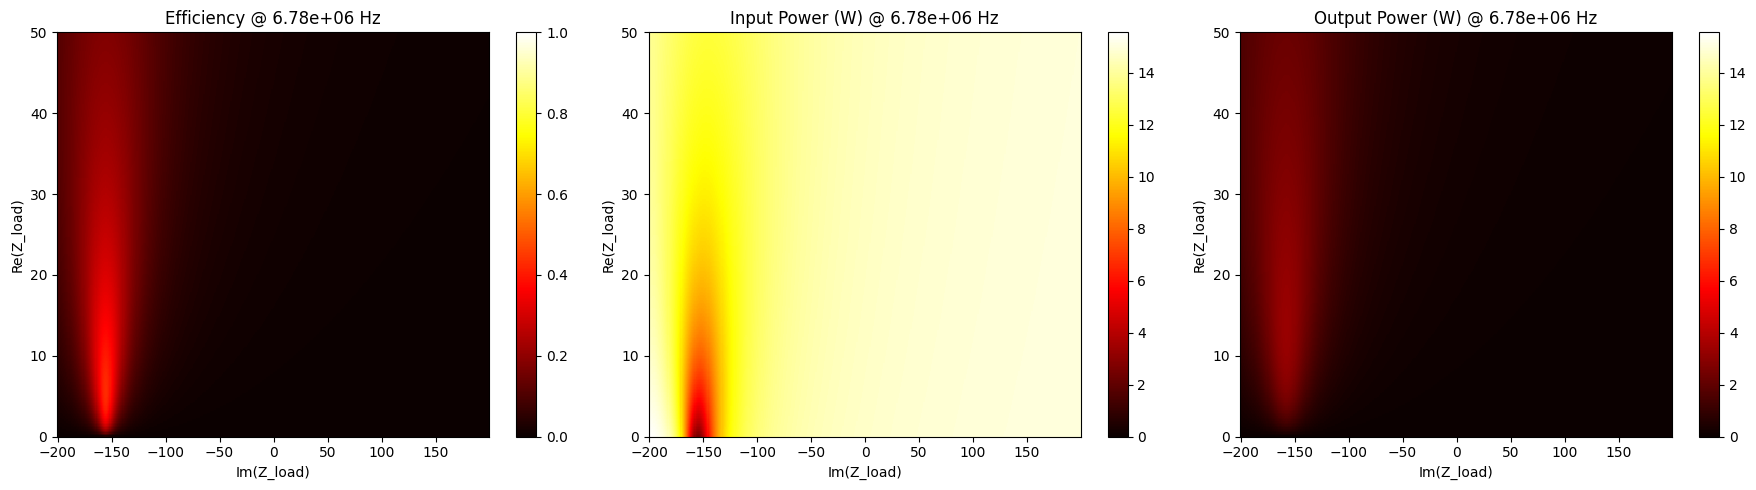

In [7]:
nw_tools.plot_optimal_load(
    rich_nw=example_nw,
    min_rez=0.1,
    max_rez=50,
    step_rez=0.2,
    min_imz=-200,
    max_imz=200,
    step_imz=1,
    input_voltage=5,
    rx_port=1
)

### Capacitor filter calculator
![](https://github.com/t-sasatani/wpt-analysis/blob/main/examples/img/CpCsRltopology.png?raw=1)

In [10]:
nw_tools.calc_rxc_filter(
    rich_nw=example_nw,
    rx_port = 1,
    rload = 100,
    c_network = 'CpCsRl'
)

2025-10-07 21:09:04 [INFO] wpt_tools.analysis: Target frequency: 7.272e+06
2025-10-07 21:09:04 [INFO] wpt_tools.analysis: Maximum efficiency: 0.45
2025-10-07 21:09:04 [INFO] wpt_tools.analysis: Receiver inductance: 4.22e-06
2025-10-07 21:09:04 [INFO] wpt_tools.analysis: Optimum load: 6.39
2025-10-07 21:09:04 [INFO] wpt_tools.analysis: Target Rload: 100.00

2025-10-07 21:09:04 [INFO] wpt_tools.analysis: [8.49553872e-11 2.89396275e-11]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 151
